<h2>Matplotlib</h2>
<p><img src="https://matplotlib.org/3.2.1/_static/logo2_compressed.svg" style="width:40%" /></p>

A ideia é de recriar os seguintes graficos com matplotlib 
<img src="img/1 1VqmH1tZwlzw-NXHP5IhmQ.png">

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../datasets/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df_grouped = df.groupby('Platform').sum()[['NA_Sales','EU_Sales','JP_Sales','Other_Sales', 'Global_Sales']]
df_grouped

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
2600,90.60,5.47,0.00,0.91,97.08
3DO,0.00,0.00,0.10,0.00,0.10
3DS,78.87,58.52,97.35,12.63,247.46
DC,5.43,1.69,8.56,0.27,15.97
DS,390.71,194.65,175.57,60.53,822.49
GB,114.32,47.82,85.12,8.20,255.45
GBA,187.54,75.25,47.33,7.73,318.50
GC,133.46,38.71,21.58,5.18,199.36
GEN,19.27,5.52,2.67,0.89,28.36


That is too many values; even considering the empty records, there will be too many bars in our chart.

Let’s plot a bar for each platform and region and get a look at the result.

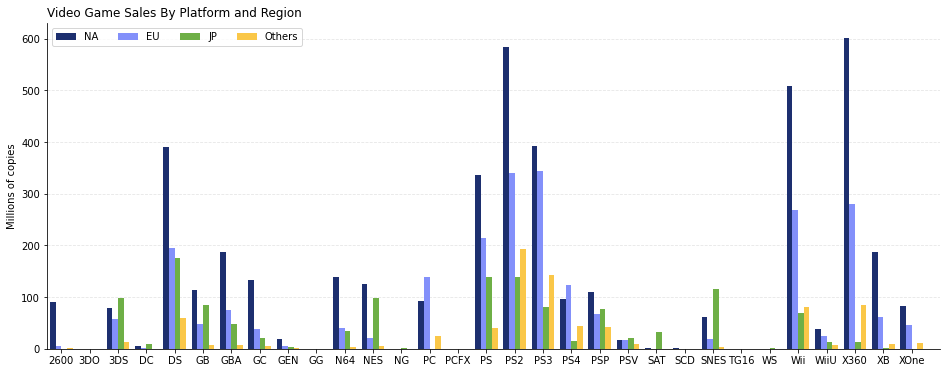

In [4]:
# define figure
fig, ax = plt.subplots(1, figsize=(16, 6))# numerical x
x = np.arange(0, len(df_grouped.index))# plot bars
plt.bar(x - 0.3, df_grouped['NA_Sales'], width = 0.2, color = '#1D2F6F')
plt.bar(x - 0.1, df_grouped['EU_Sales'], width = 0.2, color = '#8390FA')
plt.bar(x + 0.1, df_grouped['JP_Sales'], width = 0.2, color = '#6EAF46')
plt.bar(x + 0.3, df_grouped['Other_Sales'], width = 0.2, color = '#FAC748')# remove spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)# x y details
plt.ylabel('Millions of copies')
plt.xticks(x, df_grouped.index)
plt.xlim(-0.5, 31)# grid lines
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.2)# title and legend
plt.title('Video Game Sales By Platform and Region', loc ='left')
plt.legend(['NA', 'EU', 'JP', 'Others'], loc='upper left', ncol = 4)
plt.show()

As expected, the chart is hard to read. Let’s try the stacked bar chart and add a few adjustments.

First, we can sort the values before plotting, giving us a better sense of order and making it easier to compare the bars. We’ll do so with the ‘Global Sales’ column since it has the total.

In [5]:
## sort values
df_grouped = df_grouped.sort_values('Global_Sales')
df_grouped

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PCFX,0.00,0.00,0.03,0.00,0.03
GG,0.00,0.00,0.04,0.00,0.04
3DO,0.00,0.00,0.10,0.00,0.10
TG16,0.00,0.00,0.16,0.00,0.16
WS,0.00,0.00,1.42,0.00,1.42
NG,0.00,0.00,1.44,0.00,1.44
SCD,1.00,0.36,0.45,0.05,1.87
DC,5.43,1.69,8.56,0.27,15.97
GEN,19.27,5.52,2.67,0.89,28.36


Earlier, to build a clustered bar chart, we used a plot for each region where the width parameter and adjustments in the x-axis helped us fit each platform's four areas.

Similarly, for plotting stack bar charts, we’ll use a plot for each region. This time we’ll use the bottom/left parameter to tell Matplotlib what comes before the bars we’re drawing.

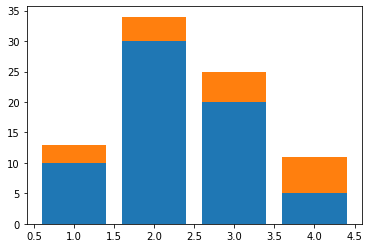

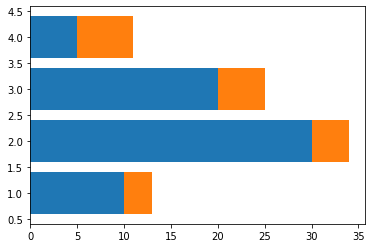

In [6]:
plt.bar([1,2,3,4], [10,30,20,5])
plt.bar([1,2,3,4], [3,4,5,6], bottom = [10,30,20,5])
plt.show()
plt.barh([1,2,3,4], [10,30,20,5])
plt.barh([1,2,3,4], [3,4,5,6], left = [10,30,20,5])
plt.show()

Cool. We can use a loop to plot the bars, passing a list of zeros for the ‘bottom’ parameter in the first set and accumulating the following values for the next regions.

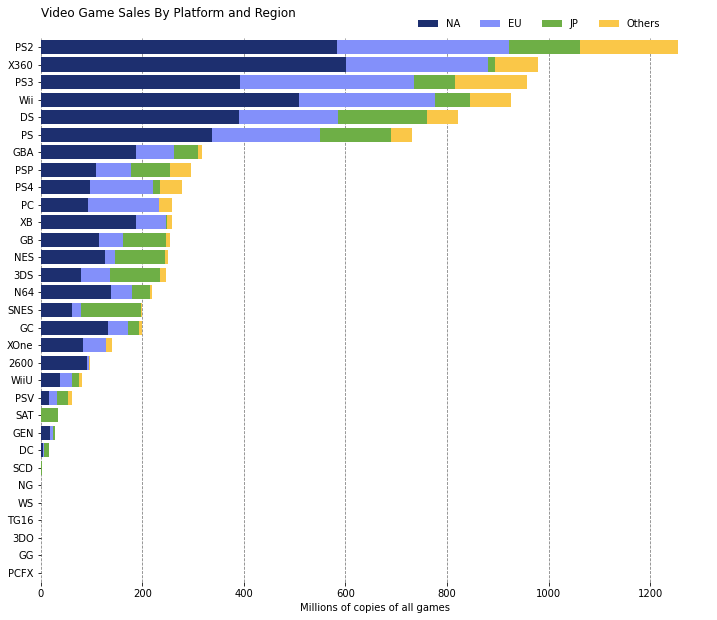

In [7]:
fields = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['NA', 'EU', 'JP', 'Others']# figure and axis
fig, ax = plt.subplots(1, figsize=(12, 10))# plot bars
left = len(df_grouped) * [0]
for idx, name in enumerate(fields):
    plt.barh(df_grouped.index, df_grouped[name], left = left, color=colors[idx])
    left = left + df_grouped[name]# title, legend, labels
plt.title('Video Game Sales By Platform and Region\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Millions of copies of all games')# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

Great, this is way more readable than the last one.

It’s important to remember the purpose of this chart before trying to extract any insights. The idea here is to compare the platforms' total sales and understand each platform's composition.

Comparing totals across fields and comparing regions inside one bar is ok. Comparing regions from different bars, on the other hand, can be very misleading.

In this case, we can compare the NA region across the bars since it has the same starting point for every bar, but it isn't so easy to compare the others. Take the X360, for example, it has a lower value for JP than the PS2, but it’s hard to compare if the Others value is higher or lower than the Wii.

Suppose we change the stack's order, with Other Sales as the first bar, and sort the records by Other Sales. It should be easier to tell which is more significant.

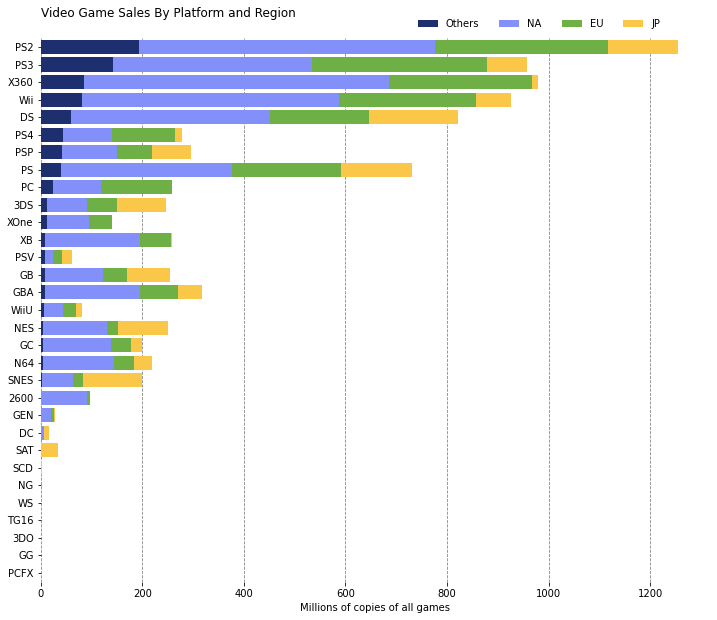

In [8]:
## sort values
df_grouped = df_grouped.sort_values('Other_Sales')
fields = ['Other_Sales', 'NA_Sales','EU_Sales','JP_Sales']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748']
labels = ['Others', 'NA', 'EU', 'JP']
fig, ax = plt.subplots(1, figsize=(12, 10))# plot bars
left = len(df_grouped) * [0]
for idx, name in enumerate(fields):
    plt.barh(df_grouped.index, df_grouped[name], left = left, color=colors[idx])
    left = left + df_grouped[name]# title, legend, labels
plt.title('Video Game Sales By Platform and Region\n', loc='left')
plt.legend(labels, bbox_to_anchor=([0.55, 1, 0, 0]), ncol=4, frameon=False)
plt.xlabel('Millions of copies of all games')# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)# adjust limits and draw grid lines
plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', linestyle='dashed')
plt.show()

There are two essential elements in this visualization, the order of the categories in the stack of bars and the rows' order.

If we want to emphasize one region, we can sort the records with the chosen field and use it as the left-most bar.

If we don’t, we can sort the records by the total and order the stacks with the categories that have higher values first.

Stacked bar charts are excellent for comparing categories and visualizing their composition, but we can take even more advantage of them.

We can focus on displaying parts of a whole. To achieve that we’ll have to prepare our data and calculate the proportion of sales for each region.

In [9]:
fields = ['Other_Sales', 'NA_Sales','EU_Sales','JP_Sales']
df_grouped = df.groupby('Platform').sum()# in some cases global sales is not equal to the sum of all regions
# so I'll re calculate it
df_grouped['Global_Sales'] = df_grouped[fields].sum(axis=1)# create a column for each regions proportion of global sales
for i in fields:
    df_grouped['{}_Percent'.format(i)] = df_grouped[i] / df_grouped['Global_Sales']

df_grouped.sort_values('NA_Sales_Percent', inplace=True)
df_grouped

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Other_Sales_Percent,NA_Sales_Percent,EU_Sales_Percent,JP_Sales_Percent
Platform,,,,,,,,,,,
GG,13527,1992.0,0.00,0.00,0.04,0.00,0.04,0.000000,0.000000,0.000000,1.000000
3DO,43118,5984.0,0.00,0.00,0.10,0.00,0.10,0.000000,0.000000,0.000000,1.000000
PCFX,14559,1996.0,0.00,0.00,0.03,0.00,0.03,0.000000,0.000000,0.000000,1.000000
WS,47273,12000.0,0.00,0.00,1.42,0.00,1.42,0.000000,0.000000,0.000000,1.000000
TG16,24763,3990.0,0.00,0.00,0.16,0.00,0.16,0.000000,0.000000,0.000000,1.000000
NG,127988,23934.0,0.00,0.00,1.44,0.00,1.44,0.000000,0.000000,0.000000,1.000000
SAT,1614771,345313.0,0.72,0.54,32.26,0.07,33.59,0.002084,0.021435,0.016076,0.960405
PSV,4732241,829782.0,16.20,16.33,20.96,8.45,61.94,0.136422,0.261543,0.263642,0.338392
SNES,1516804,476529.0,61.23,19.04,116.55,3.22,200.04,0.016097,0.306089,0.095181,0.582633


Now we can pretty much repeat what we did earlier with some small tweaks. Let’s also get our code into a method so we can reuse it.

IndexError: list index out of range

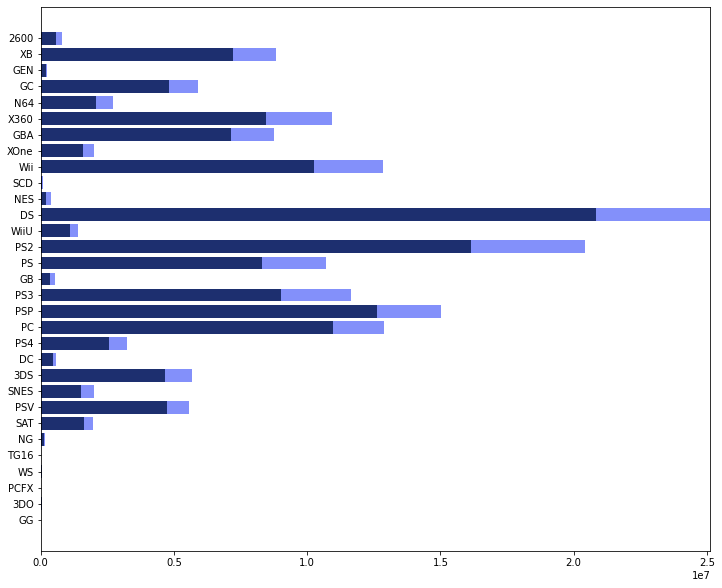

In [12]:
# variables
labels = ['NA', 'EU', 'JP', 'Others']
colors = ['#1D2F6F', '#8390FA', '#6EAF46', '#FAC748', 'red', 'green']
title = 'Video Game Sales By Platform and Region\n'
subtitle = 'Proportion of Games Sold by Region'

def plot_stackedbar_p(df, labels, colors, title, subtitle):
    fields = df.columns.tolist()
    
    # figure and axis
    fig, ax = plt.subplots(1, figsize=(12, 10))# plot bars
    left = len(df) * [0]
    for idx, name in enumerate(fields):
        plt.barh(df.index, df[name], left = left, color=colors[idx])
        left = left + df[name]# title and subtitle
    plt.title(title, loc='left')
    plt.text(0, ax.get_yticks()[-1] + 0.75, subtitle)
    # legend
    plt.legend(labels, bbox_to_anchor=([0.58, 1, 0, 0]), ncol=4, frameon=False)# remove spines
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # format x ticks
    xticks = np.arange(0,1.1,0.1)
    xlabels = ['{}%'.format(i) for i in np.arange(0,101,10)]
    plt.xticks(xticks, xlabels)
    # adjust limits and draw grid lines
    plt.ylim(-0.5, ax.get_yticks()[-1] + 0.5)
    ax.xaxis.grid(color='gray', linestyle='dashed')
    plt.show()
    
plot_stackedbar_p(df_grouped, labels, colors, title, subtitle)

Lastly, let’s try building a stacked bar chart with both positive and negative values.

We’ll create a dummy data frame for this example.

In [13]:
# lists
sales_revenue = [1230, 1240, 1170, 1050, 1380, 1480, 1400, 1410, 1360, 1415, 1530]
interest_revenue = [150, 155, 159, 176, 290, 240, 195, 146, 180, 182, 210]
fixed_costs = [-810, -810, -815, -815, -1780, -780, -750, -750, -750, -770, -910] 
variable_costs =[-380, -410, -415, -370, -520, -655, -715, -670, -515, -510, -420]# lists to dict
my_dict = {'sales_revenue': sales_revenue, 'interest_revenue': interest_revenue, 
          'fixed_costs': fixed_costs, 'variable_costs': variable_costs}# dict to df
result_df = pd.DataFrame(my_dict)
result_df

,sales_revenue,interest_revenue,fixed_costs,variable_costs
0,1230,150,-810,-380
1,1240,155,-810,-410
2,1170,159,-815,-415
3,1050,176,-815,-370
4,1380,290,-1780,-520
5,1480,240,-780,-655
6,1400,195,-750,-715
7,1410,146,-750,-670
8,1360,180,-750,-515
9,1415,182,-770,-510


The plan is to have a positive bar, divided into sales and interest revenue, and a negative bar, divided into fixed and variable costs, for each month.

We want interest_revenue on top, so we use sales_revenue as the ‘bottom’ argument when plotting.

We want fixed_costs at the top for the negative values, but instead, we’ll plot variable_costs with fixed_costs as the ‘bottom’ argument.

<BarContainer object of 11 artists>

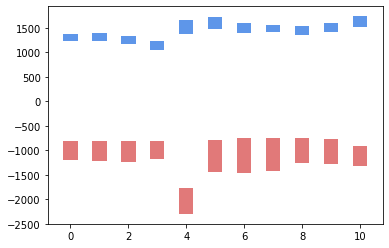

In [14]:
plt.bar(result_df.index, result_df['interest_revenue'], 
        bottom = result_df['sales_revenue'], color = '#5E96E9', width =0.5)
plt.bar(result_df.index, result_df['variable_costs'], 
        bottom = result_df['fixed_costs'], color = '#E17979', width =0.5)

Again, the rest is very similar to what we already did.

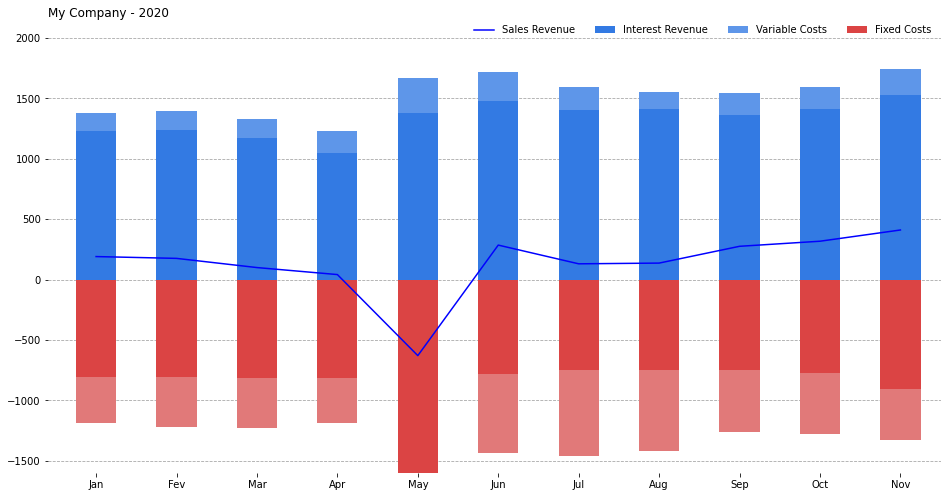

In [15]:
fig, ax = plt.subplots(1, figsize=(16, 8))
plt.bar(result_df.index, result_df['sales_revenue'], color = '#337AE3', width =0.5)
plt.bar(result_df.index, result_df['interest_revenue'], bottom = result_df['sales_revenue'], color = '#5E96E9', width =0.5)
plt.bar(result_df.index, result_df['fixed_costs'], color = '#DB4444', width =0.5)
plt.bar(result_df.index, result_df['variable_costs'], bottom = result_df['fixed_costs'], color = '#E17979', width =0.5)
result_df['Rentabilidade'] =  result_df['sales_revenue'] + result_df['interest_revenue'] + result_df['fixed_costs'] + result_df['variable_costs']
pos_signal = result_df['Rentabilidade'].copy()
neg_signal = result_df['Rentabilidade'].copy()

pos_signal[pos_signal <= 0] = np.nan
neg_signal[neg_signal > 0] = np.nan

plt.plot(result_df.index, result_df['Rentabilidade'], color='b')

# x and y limits
plt.xlim(-0.6, 10.5)
plt.ylim(-1600, 2000)
# remove spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#grid
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed', alpha=0.7)
# x ticks
xticks_labels = ['Jan', 'Fev', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov']
plt.xticks(result_df.index , labels = xticks_labels)
# title and legend
legend_label = ['Sales Revenue', 'Interest Revenue', 'Variable Costs', 'Fixed Costs']
plt.legend(legend_label, ncol = 4, bbox_to_anchor=([1, 1.05, 0, 0]), frameon = False)
plt.title('My Company - 2020\n', loc='left')
plt.show()

# Wow